In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [20]:
# generate some random data with three-some trend
x = np.array([-100, 280, -290, 23, 101, 110])
y = np.array([56, 100, 590, 470, 200, 25])
phi = np.array([29.3, 21.0, 19.2, 29.1, 21.9, 23.1])

Text(0.5, 1.0, 'Measured Porosity (%)')

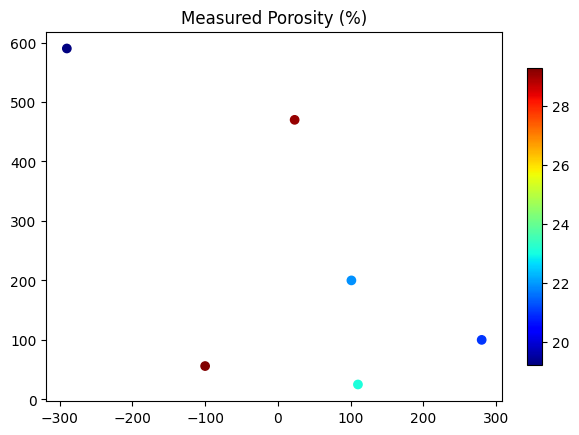

In [21]:
cax = plt.scatter(x, y, c=phi, cmap=plt.cm.jet)
cbar = plt.colorbar(cax, fraction=.03)
plt.title('Measured Porosity (%)')

Initial look of the data. 

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 20.854648450097464
Full Sill: 20.854648450403687
Range: 385.05046368625807
Nugget: 3.062220279079762e-10 



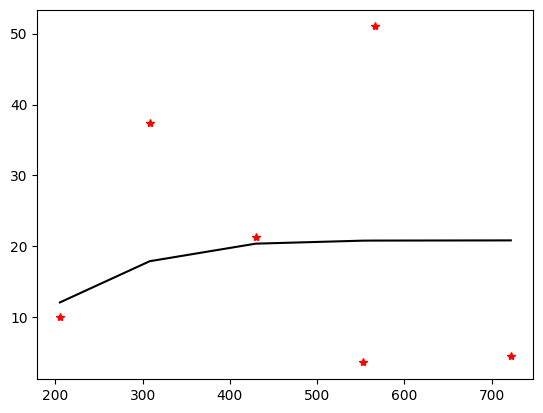

Calculating statistics on variogram model fit...


In [22]:
OK = OrdinaryKriging(x, y, phi, variogram_model='gaussian', verbose=True, enable_plotting=True,)

More similarity in the right hand side, this is because the data is sparse.

In [23]:
gridx = np.arange(-300, 300, 10, dtype='float64')
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute('grid', gridx, gridy)
# estimates at the grid locations by interpolation. z* is the known value, ss is the unknown of the estimate
print(zstar.shape)
print(ss.shape)

Executing Ordinary Kriging...

(60, 60)
(60, 60)


Estimates at the grid locations by interpolation. `z*` is the known value, `ss` is the unknown of the estimate.


Text(0.5, 1.0, 'Porosity Estimate')

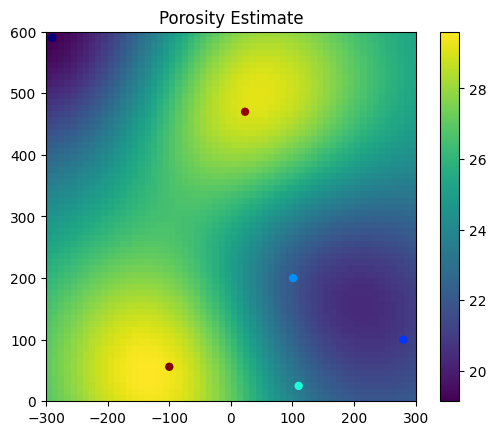

In [24]:
cax = plt.imshow(zstar, extent=[-300, 300, 0, 600], origin='lower')
plt.scatter(x, y, c=phi, marker='.', s=100, cmap=plt.cm.jet)
cbar = plt.colorbar(cax)
plt.title('Porosity Estimate')

/var/folders/sp/gm0tt5zx5t9dh__5x5l8g1600000gn/T/ipykernel_15144/3300672301.py:1: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent=[-300, 300, 0, 600], origin='lower', vmin=0)


Text(0.5, 1.0, 'Porosity Standard Deviation')

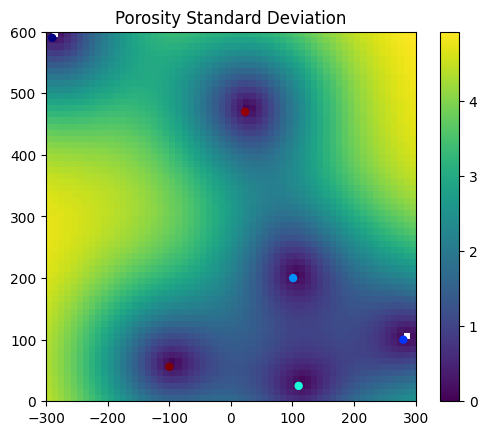

In [25]:
cax = plt.imshow(np.sqrt(ss), extent=[-300, 300, 0, 600], origin='lower', vmin=0)
plt.scatter(x, y, c=phi, marker='.', s=100, cmap=plt.cm.jet)
cbar = plt.colorbar(cax)
plt.title('Porosity Standard Deviation')

This shows us how uncertian our model is, the certainty is equal the variance `ss` and to the square root to get the standard deviation.

Text(0.5, 1.0, 'Porosity Variance')

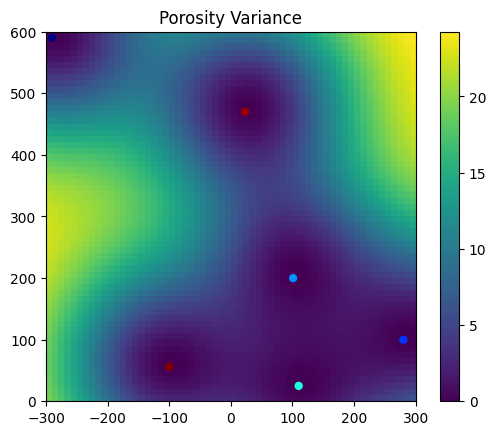

In [26]:
cax = plt.imshow(ss, extent=[-300, 300, 0, 600], origin='lower', vmin=0)
plt.scatter(x, y, c=phi, marker='.', s=100, cmap=plt.cm.jet)
cbar = plt.colorbar(cax)
plt.title('Porosity Variance')

Away from the observed points the maximum uncertainty is the value of the sill around 20. This means that the max incertainty flattens out as we go farther from the observations. The model parameters show the given model, aka gaussian, exponential, etc.

In [27]:
OK.variogram_model_parameters

array([2.08546485e+01, 3.85050464e+02, 3.06222028e-10])

We now see that the `gaussian` model fits the data smoother than the `exponential` model. 